In [ ]:
import LinearAlgebra as linalg
import Plots as plt
import Polynomials as poly
import NonlinearSolve as nonlin

using Format
using .Threads
using ProgressMeter

include("cheb.jl")
include("solvers.jl")
include("FlatTimeStepExpr.jl")
include("FlatCoeffExpr.jl")

Vfun(x) = ( -576. - 288. * x^2 - 64. * x^4 + 22. * x^6 - x^8) / 192.;
DV(x) = - x * (144. + 64. * x^2 - 33. * x^4 + 2. * x^6) / 48.;

In [ ]:
T = BigFloat  # precision type (change here if needed)
setprecision(T, 512) #Huge precision - plenty of work could be done.

Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;
IterMax = 10;

zmin = T(1e-40);
zmax = T(.55);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

In [112]:
DS0(t) = T(1);
DS1(t) = T(0);
DS2(t) = T(0);
DS3(t) = T(0);
DS4(t) = T(0);

In [113]:
InitGuess = zeros(T,NVar,N);
InitGuess[2,:] = ones(T,N)/54;
# AHind = Int64(30);
zAH = T(0.5);
X = T(0.);
p2 = 0;
a4 = T(-50);
tinit = T(0);
M  = T(1);
margin = 10;


In [117]:
# Computing the initial values of the fields, in particular of ξ(t_0)

X = T(0.);
Var = copy(InitGuess);
for ii in 1:200
    Var[2,1:N] = LinearSolveODE(Var, 1, a4, X, tinit);
    Var[3,1:N] = LinearSolveODE(Var, 2, a4, X, tinit);
    X = CorrectXi(Var, X, tinit,margin);
    print("\rX = $X")
    flush(stdout)
end

X = 0.751722182730903800994191037777593294384868739391924888477345069953389078247780354942898873205414717120584271781023498541827413197347853744029305038059788149

In [118]:
initX = copy(X);

Ndom = 4;
Npts = 15;
N = Ndom * Npts;
NVar = 5;
IterMax = 10;

zmin = T(1e-40);
zmax = T(.5);

DiffMats2, DiffMats, grid = MultiGridChebyshev(zmin, zmax, Ndom,Npts);

InitGuess = zeros(T,NVar,N);
InitGuess[2, 1:N] = ones(T,1,N) / 54; 

In [119]:
InitVar = ComputeBulk(InitGuess[1,1:N], initX, a4,0);

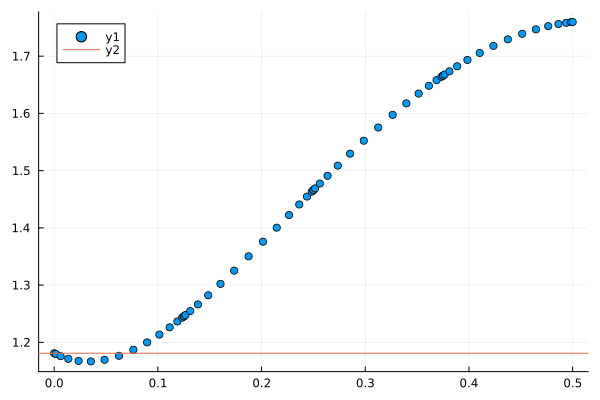

In [120]:
plt.scatter(grid,InitVar[4,1:N])
bc = M^3/3+3*M*X^2/2;
plt.hline!([bc])

In [121]:
OutputArr = [];
MonitorArr = [];

Evolve(InitVar, initX, a4, 0, 2, .0005, 10, OutputArr, MonitorArr)

◐ time = 1.999 Sdot at zAH = 0.000    Time: 0:02:32m

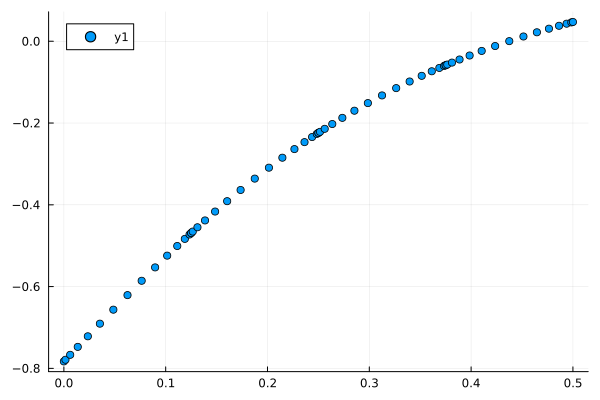

In [125]:
plt.scatter(grid,OutputArr[end][4][1,:])

In [141]:
TimeArr = [x[1][1] for x in OutputArr];
XArr = [x[2][1] for x in OutputArr];

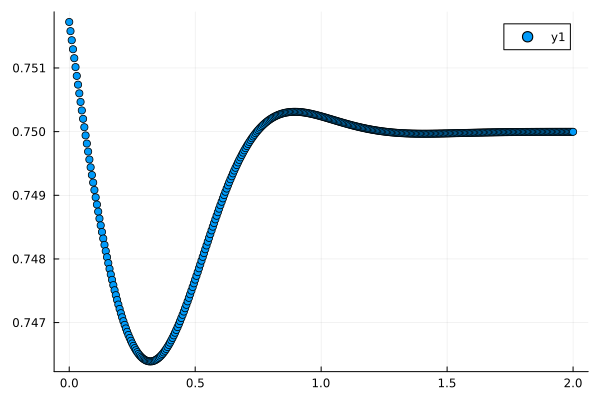

In [142]:
plt.scatter(TimeArr,XArr)

In [ ]:
fig = PlotSdot(OutputArr[end][:,:], XArr[end], 0, 55);
plt.title!(fig,string("RK4, with dt = $dt and zmax = ",format(zmax, precision=2),", at t = ",format(Timearr[end],precision=2)))
display(fig)

In [ ]:
# plt.savefig(fig,"RK4better.png")

In [ ]:
Timearr[end]

In [ ]:
XArr[end]

In [ ]:
plt.scatter(Timearr,XArr)

In [ ]:
plt.scatter(Timearr,Momentum, yscale = :log10)
plt.scatter!(Timearr, Energy)
plt.scatter!(Timearr, Operator)


In [ ]:
offset = length(Timearr);
fig = PlotSdot(OutputArr[offset][:,:], XArr[offset], 0, 40);
display(fig)

In [ ]:
tmp = abs.(Operator .- Operator[end])[1:end-1];
plt.scatter(Timearr[1:end-1],tmp, yscale=:log10 )

In [ ]:
# using Serialization

# open("flatrun.dat","w") do io
#     serialize(io, [Timearr,OutputArr, XArr, a4Arr]);
# end